<a href="https://colab.research.google.com/github/moniruzzamanzilani/Computer-Vision-/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [20]:
(train_imgs, train_labels), (test_imgs, test_lables) = datasets.cifar10.load_data()

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

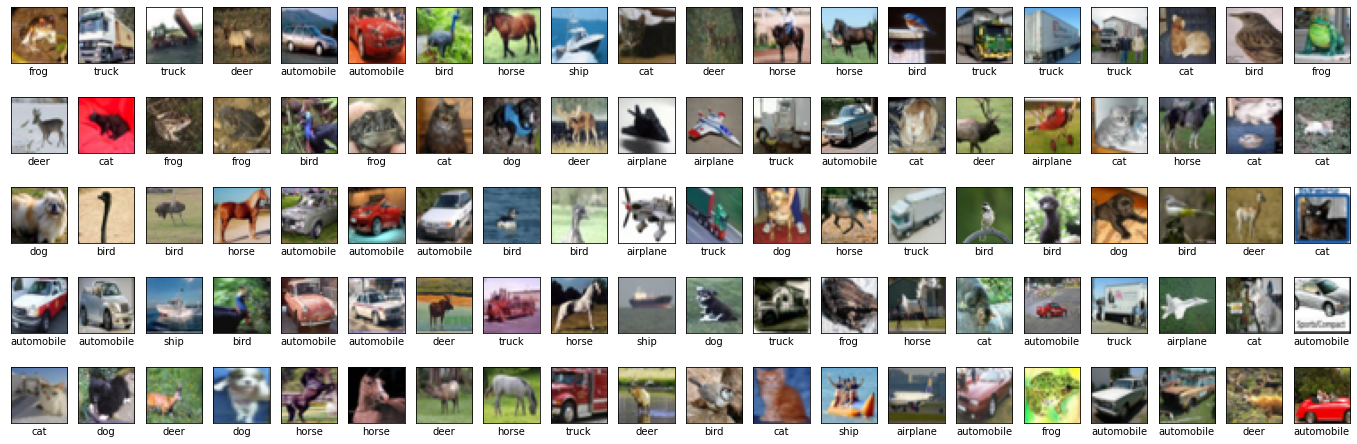

In [22]:
plt.figure(figsize=(24,8))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(train_imgs[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel( class_names[ train_labels[i][0] ])
plt.show()

In [23]:
model = models.Sequential()

model.add( layers.Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same', input_shape=train_imgs[0].shape ))
model.add( layers.Activation('relu') )
model.add( layers.BatchNormalization()) 
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Dropout(0.2) )

model.add( layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same' ))
model.add( layers.Activation('relu') )
model.add( layers.BatchNormalization()) 
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Dropout(0.3) )

model.add( layers.Conv2D(256, (3,3), kernel_initializer='he_uniform', padding='same' ))
model.add( layers.Activation('relu') )
model.add( layers.BatchNormalization()) 
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Dropout(0.4) )

model.add( layers.Flatten())
model.add( layers.Dense(64, kernel_initializer='he_uniform'))
model.add( layers.Activation('relu'))
model.add( layers.BatchNormalization()) 
model.add( layers.Dense(10))
model.add( layers.Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
activation_11 (Activation)   (None, 16, 16, 128)      

In [24]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
h = model.fit(train_imgs, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6444 - accuracy: 0.4218 - val_loss: 1.1075 - val_accuracy: 0.6081
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0184 - accuracy: 0.6428 - val_loss: 0.8588 - val_accuracy: 0.7060
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8691 - accuracy: 0.6946 - val_loss: 0.8032 - val_accuracy: 0.7256
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7625 - accuracy: 0.7322 - val_loss: 0.7588 - val_accuracy: 0.7366
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6989 - accuracy: 0.7539 - val_loss: 0.7948 - val_accuracy: 0.7262
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6410 - accuracy: 0.7754 - val_loss: 0.6791 - val_accuracy: 0.7666
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5938 - accuracy: 0.7900 - val_loss: 0.7742 - val_accuracy:

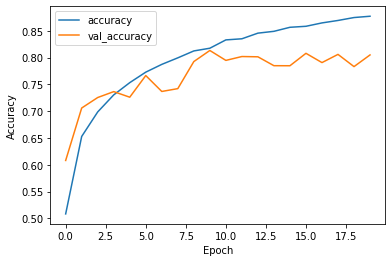

In [26]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(test_imgs, test_lables)
print(test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6394 - accuracy: 0.8017
0.6393656730651855 0.8016999959945679
